In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [6]:
df = pd.read_csv(
    "../processed/etf_returns.csv",
    parse_dates=["Date"]
    )

df.head()

,Date,Adj_Close,Ticker,Market,Daily_Return,Cumulative_Return
0,2014-01-02,56.922413,BND,US,NaN,NaN
1,2014-01-03,56.929501,BND,US,0.000125,0.000125
2,2014-01-06,56.979229,BND,US,0.000874,0.000998
3,2014-01-07,57.050289,BND,US,0.001247,0.002247
4,2014-01-08,56.865547,BND,US,-0.003238,-0.000999


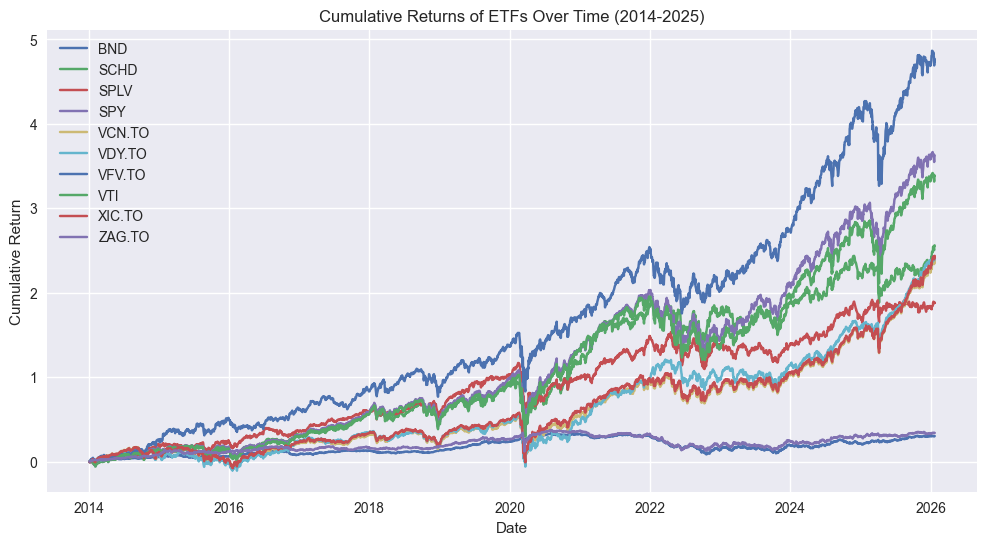

In [8]:
plt.figure(figsize=(12, 6))

for ticker in df["Ticker"].unique():
    subset = df[df["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Cumulative_Return"], label=ticker)

plt.title("Cumulative Returns of ETFs Over Time (2014-2025)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
summary = (
    df.groupby("Ticker")
    .agg(
        cumulative_return=("Cumulative_Return", "max"),
        daily_volatility=("Daily_Return","std")
    )
)

summary["annualized_volatility"] = summary["daily_volatility"] * np.sqrt(252)
summary

,cumulative_return,daily_volatility,annualized_volatility
Ticker,,,
BND,0.336348,0.003265,0.051832
SCHD,2.561566,0.010163,0.161333
SPLV,1.920733,0.009442,0.149884
SPY,3.665941,0.010905,0.173116
VCN.TO,2.387474,0.009246,0.146772
VDY.TO,2.429225,0.009870,0.156687
VFV.TO,4.865260,0.010168,0.161412
VTI,3.418024,0.011111,0.176379
XIC.TO,2.437777,0.009165,0.145489


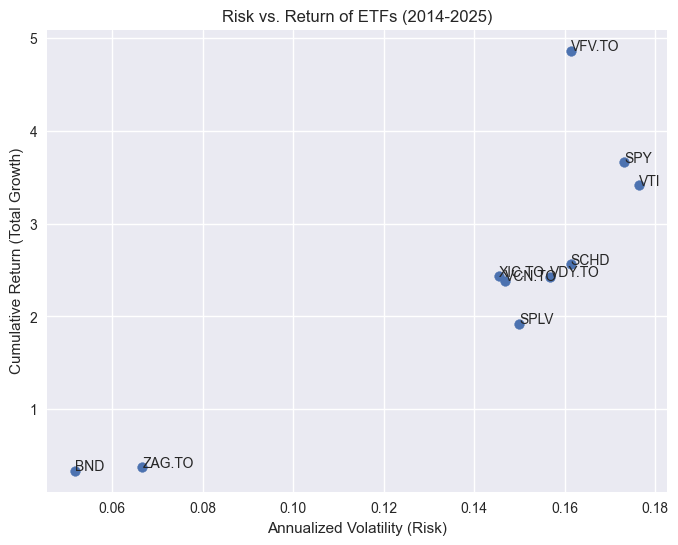

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(
    summary["annualized_volatility"],
    summary["cumulative_return"]    
)

for ticker in summary.index:
    plt.text(
        summary.loc[ticker, "annualized_volatility"],
        summary.loc[ticker, "cumulative_return"],
        ticker
    )

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Cumulative Return (Total Growth)")
plt.title("Risk vs. Return of ETFs (2014-2025)")
plt.grid(True)  
plt.show()

In [14]:
summary.sort_values("cumulative_return", ascending=False)

,cumulative_return,daily_volatility,annualized_volatility
Ticker,,,
VFV.TO,4.865260,0.010168,0.161412
SPY,3.665941,0.010905,0.173116
VTI,3.418024,0.011111,0.176379
SCHD,2.561566,0.010163,0.161333
XIC.TO,2.437777,0.009165,0.145489
VDY.TO,2.429225,0.009870,0.156687
VCN.TO,2.387474,0.009246,0.146772
SPLV,1.920733,0.009442,0.149884
ZAG.TO,0.376515,0.004201,0.066694


In [16]:
return_pivot = df.pivot(
    index="Date",
    columns="Ticker",
    values="Daily_Return"
)

return_pivot.head()

Ticker,BND,SCHD,SPLV,SPY,VCN.TO,VDY.TO,VFV.TO,VTI,XIC.TO,ZAG.TO
Date,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.000125,0.001377,0.000611,-0.000164,-0.002212,0.003349,-0.003174,-0.000210,-0.002796,0.000661
2014-01-06,0.000874,-0.003576,-0.003053,-0.002898,-0.004064,-0.008013,-0.001158,-0.002630,-0.004205,0.000661
2014-01-07,0.001247,0.005522,0.007349,0.006142,0.010015,0.005049,0.018256,0.006434,0.008446,0.002642
2014-01-08,-0.003238,-0.003570,-0.004256,0.000218,0.001469,-0.001340,0.001992,0.000734,0.000931,0.000659


In [17]:
correlation_matrix = return_pivot.corr()
correlation_matrix

Ticker,BND,SCHD,SPLV,SPY,VCN.TO,VDY.TO,VFV.TO,VTI,XIC.TO,ZAG.TO
Ticker,,,,,,,,,,
BND,1.000000,0.078015,0.162203,0.094407,0.151128,0.091726,0.045074,0.100797,0.140925,0.661048
SCHD,0.078015,1.000000,0.859114,0.889299,0.716243,0.748623,0.782964,0.887693,0.764811,0.068434
SPLV,0.162203,0.859114,1.000000,0.808446,0.646597,0.662259,0.728210,0.800923,0.696459,0.185837
SPY,0.094407,0.889299,0.808446,1.000000,0.755925,0.712608,0.891330,0.996002,0.805354,0.090112
VCN.TO,0.151128,0.716243,0.646597,0.755925,1.000000,0.844244,0.679714,0.769282,0.918347,0.195420
VDY.TO,0.091726,0.748623,0.662259,0.712608,0.844244,1.000000,0.635623,0.721780,0.914129,0.128976
VFV.TO,0.045074,0.782964,0.728210,0.891330,0.679714,0.635623,1.000000,0.886369,0.725211,0.109541
VTI,0.100797,0.887693,0.800923,0.996002,0.769282,0.721780,0.886369,1.000000,0.817467,0.100059
XIC.TO,0.140925,0.764811,0.696459,0.805354,0.918347,0.914129,0.725211,0.817467,1.000000,0.180869


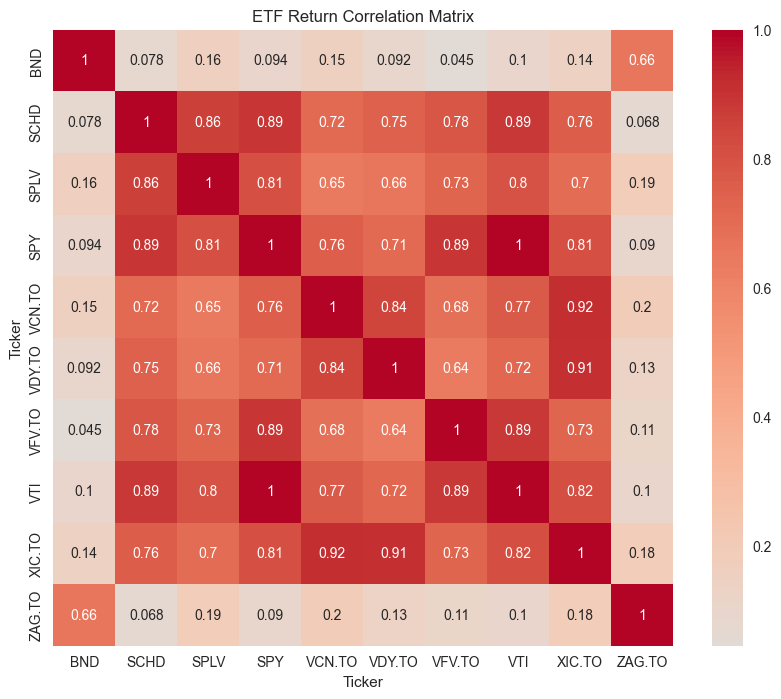

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("ETF Return Correlation Matrix")
plt.show()

In [19]:
correlation_matrix.to_csv("../processed/etf_correlation_matrix.csv")

In [20]:
df["Forward_5D_Return"] = (
    df.groupby("Ticker")["Daily_Return"]
    .shift(-5)
    .rolling(window=5)
    .sum()
)

In [21]:
df["Rolling_5D_Return"] = (
    df.groupby("Ticker")["Daily_Return"]
    .rolling(window=5)
    .sum()
    .reset_index(level=0, drop=True)
)

df["Rolling_20D_Volatility"] = (
    df.groupby("Ticker")["Daily_Return"]
    .rolling(window=20)
    .std()
    .reset_index(level=0, drop=True)
)

In [ ]:
df[[
    "Ticker",
    "Rolling_5D_Return",
    "Rolling_20D_Volatility",
    "Forward_5D_Return"
]].dropna().head()

,Ticker,Rolling_5D_Return,Rolling_20D_Volatility,Forward_5D_Return
20,BND,0.002592,0.001895,0.000392
21,BND,0.007660,0.001969,-0.002211
22,BND,0.005197,0.002045,-0.002707
23,BND,0.000883,0.002137,-0.002342
24,BND,0.000513,0.001955,0.000501


In [24]:
model_df = df[[
    "Ticker",
    "Rolling_5D_Return",
    "Rolling_20D_Volatility",
    "Forward_5D_Return"
]].dropna()

model_df.head()

,Ticker,Rolling_5D_Return,Rolling_20D_Volatility,Forward_5D_Return
20,BND,0.002592,0.001895,0.000392
21,BND,0.007660,0.001969,-0.002211
22,BND,0.005197,0.002045,-0.002707
23,BND,0.000883,0.002137,-0.002342
24,BND,0.000513,0.001955,0.000501


In [25]:
X = model_df[[
    "Rolling_5D_Return",
    "Rolling_20D_Volatility"
]]

y = model_df["Forward_5D_Return"]

In [26]:
split_idx = int(len(model_df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

rmse, r2

(0.01533211198499779, 0.02075071877019008)

In [32]:
print(f"RMSE: {rmse:.6f}")
print(f"R²: {r2:.4f}")

RMSE: 0.015332
R²: 0.0208


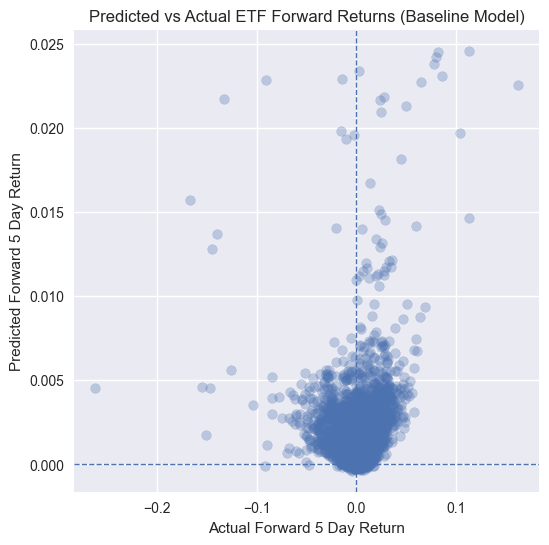

In [33]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Forward 5 Day Return")
plt.ylabel("Predicted Forward 5 Day Return")
plt.title("Predicted vs Actual ETF Forward Returns (Baseline Model)")
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

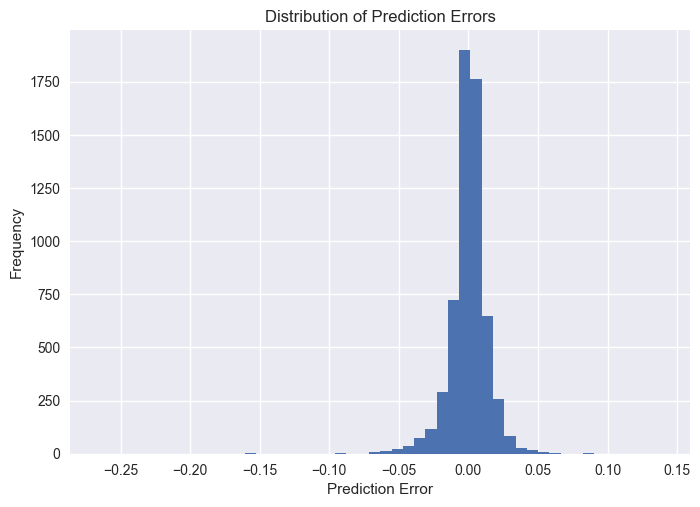

In [34]:
errors = y_test - y_pred

plt.Figure(figsize=(8, 4))
plt.hist(errors, bins=50)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

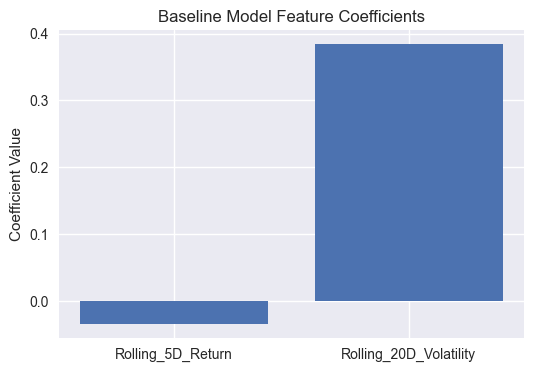

In [35]:
coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

plt.figure(figsize=(6, 4))
plt.bar(coef["Feature"], coef["Coefficient"])
plt.title("Baseline Model Feature Coefficients")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()